## Case Study - A :

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("C:/Users/vijes/Downloads/CAR DETAILS FROM CAR DEKHO.csv")
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
data.isnull().sum() # There is no null values in the data set

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


### 1.) Identify a new feature from the given data and add it as a new column to it .

In [6]:
data["Car_Age"] = 2025 - data["year"] # Now I get the age of an car by [current year - Manufacture year]
data.head() # head() == head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_Age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,18
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,18
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,13
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,8
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,11


In [7]:
data.rename(columns={"year" : "manufacture_year"})  # I Changed the column name to manufacture_year
data.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_Age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,18
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,18
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,13
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,8
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,11


##### Explanation :
###### The code loads car details from a CSV, adds a car_age column, and analyzes its impact on price, transmission, and ownership.

### 2.) Identify the outliers from the given data and remove the outliers using any method.
### I am using IQR method :

In [8]:
# Select numerical columns for outlier detection
num_cols = ["selling_price", "km_driven"]
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
# IQR 
IQR = Q3 - Q1
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out outliers
data_cleaned = data[(data[num_cols] >= lower_bound) & (data[num_cols] <= upper_bound)]
# Print before & after removing outliers
print(f"Original data size: {data.shape[0]} rows")
print(f"Cleaned data size: {data_cleaned.shape[0]} rows") # by using IQR method i am getting same value because the values in selling and the km_driven is comes under these two Quartile

Original data size: 4340 rows
Cleaned data size: 4340 rows


#### Explanation :
##### The code removes outliers in "selling_price" and "km_driven" using the IQR method, refining the dataset. The final shape is printed to show retained data.

#### 3.) Obtain a bivariate plot and a multivariable plot using the attributes of your choice from the given dataset.

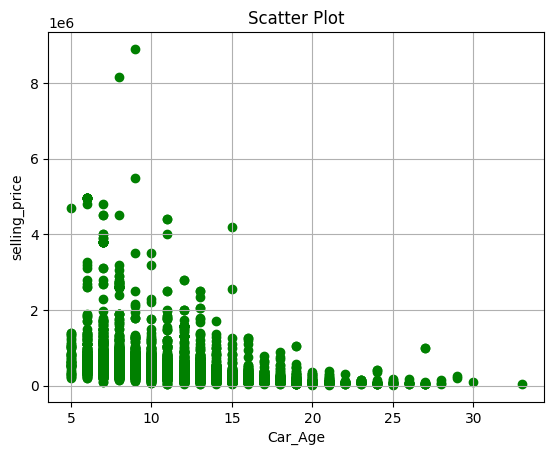

In [13]:
# To find about my dataset, I am checking by using visulization methords :
plt.scatter(data["Car_Age"], data["selling_price"], color="green")
plt.xlabel("Car_Age")
plt.ylabel("selling_price")
plt.title("Scatter Plot")
plt.grid(True)
plt.show() # By looking the graph if car_age increases the selling_price decreases . This is my outliers of my analysis

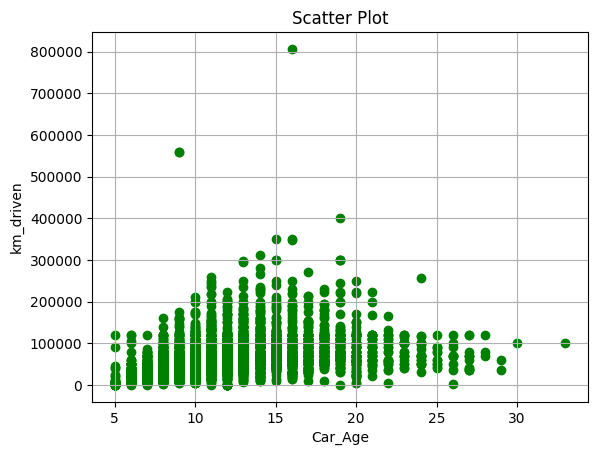

In [14]:
plt.scatter(data["Car_Age"], data["km_driven"], color="green")
plt.xlabel("Car_Age")
plt.ylabel("km_driven")
plt.title("Scatter Plot")
plt.grid(True)
plt.show() # By looking this graph  there is no use most of the cars are driven under 200000

#### Explanation :
##### Selling Price vs. Kilometers Driven: Higher mileage cars generally have lower resale values.
##### Selling Price vs. Car Age (Fuel Type): Older cars sell for less, with fuel type affecting value retention.

### 4.) Identify the car model having the maximum selling price using petrol fuel .

In [15]:
petrol_cars = data[data["fuel"] == "Petrol"]
petrol_cars.head() # only petrol cars are in this variable .

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_Age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,18
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,18
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,8
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner,18
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner,9


In [16]:
max_price_car = petrol_cars.loc[petrol_cars["selling_price"].idxmax(), ["name", "selling_price"]]
print(f"Car Model: {max_price_car['name']}")
print(f"Selling Price: ₹{max_price_car['selling_price']}")
# Explaination of this code :
# {petrol_cars["selling_price"] selects the selling price column from the petrol_cars DataFrame.
# .idxmax() finds the index (row number) of the maximum value in selling_price.} === >>> Step 1,[if it return 100]
# loc[] is used to select a specific row based on the index found in step 1.
# petrol_cars.loc[100, ["name", "selling_price"]] retrieves the car name and selling price from row 100.

Car Model: Audi RS7 2015-2019 Sportback Performance
Selling Price: ₹8900000


#### Explanation :
##### The code finds and prints the most expensive petrol car by filtering for petrol cars and selecting the highest-priced one .

### 5.) Obtain a coloured scatter plot between year of selling and transmission with a colour grading based on owner type and size based on selling price .

In [17]:
print(data["owner"].astype('category').cat.codes)
# data["owner"].astype('category')
# Converts the owner column into a categorical data type.
# This helps in assigning numeric codes to each unique category.
# .cat.codes is used for assign numeric for unique category
# Assigns a unique numerical code to each owner type.
# ==>> this code is give below for c
# ==>> and for s i had divided by 10000 because selling price is very high , ploting time it will thake more space in the graph , so cannot see another representations 
# so I used to / by 10000.

0       0
1       0
2       0
3       0
4       2
       ..
4335    2
4336    2
4337    2
4338    0
4339    0
Length: 4340, dtype: int8


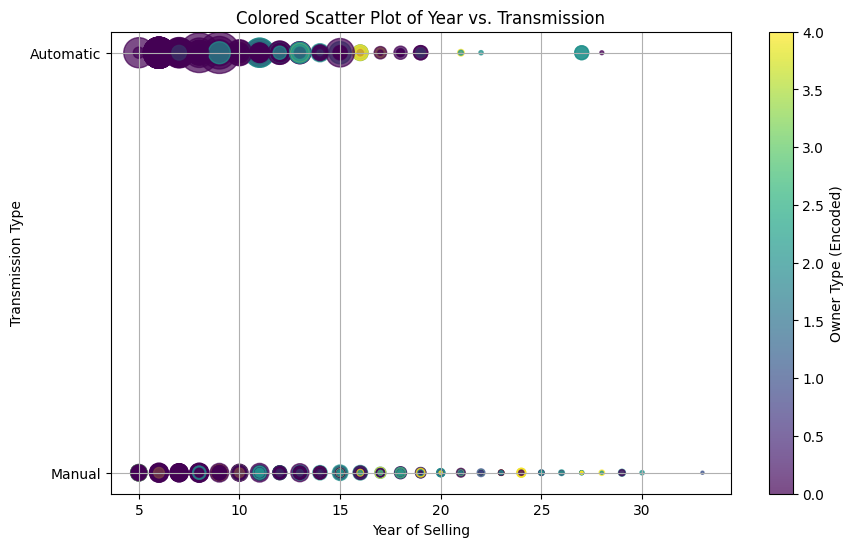

In [18]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data["Car_Age"], data["transmission"], 
                      c=data["owner"].astype('category').cat.codes, 
                      s=data["selling_price"]/10000,alpha=0.7)
plt.colorbar(scatter, label="Owner Type (Encoded)")
plt.xlabel("Year of Selling")
plt.ylabel("Transmission Type")
plt.title("Colored Scatter Plot of Year vs. Transmission")
plt.grid(True)
plt.show()
# This code creates a scatter plot where the x-axis represents Car Age, the y-axis represents Transmission Type, the color represents Owner Type, and the size of the points is scaled based on Selling Price .` 

#### Explanation :
##### The scatter plot shows selling year vs. transmission type, highlighting owner type and price patterns over time.

## Case Study - B :

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.) Identify the model of Mercedes Benz car with petrol engine type having highest mileage.

In [33]:
file = pd.read_excel(r"C:\Users\vijes\Downloads\Car_Sales.xlsx")
mercedes_petrol = file[(file['car'] == 'Mercedes-Benz') & (file['engType'] == 'Petrol')]
highest_mileage_model = mercedes_petrol.loc[mercedes_petrol['mileage'].idxmax(), 'model']
print("Mercedes-Benz with petrol engine with the highest mileage:", highest_mileage_model)

Mercedes-Benz with petrol engine with the highest mileage: E-Class


#### Explanation :
##### The code converts data to a dictionary, then loops through rows to find the petrol Mercedes with the highest mileage, updating as needed and printing the details.

## 2.) Identify a new feature from the given data set which may contribute towards the price of the car.

<Axes: title={'center': 'Line graph between Engine vareint and Price:'}, xlabel='engV', ylabel='price'>

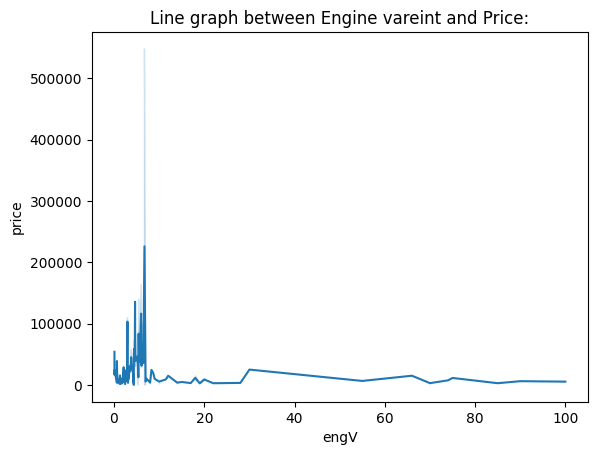

In [36]:
data = file
plt.title("Line graph between Engine vareint and Price:")
sns.lineplot(x='engV',y='price',data=data)

<Axes: title={'center': 'Line graph between Mileage and Price:'}, xlabel='mileage', ylabel='price'>

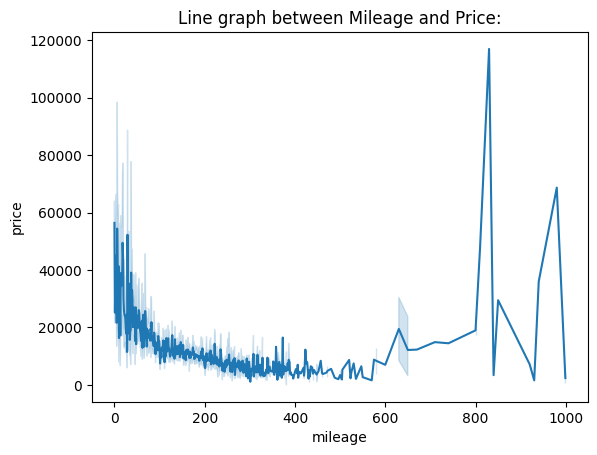

In [37]:
plt.title("Line graph between Mileage and Price:")
sns.lineplot(x='mileage',y='price',data=data)

#### Explanation :
##### Line plots show that car prices vary by engine type: gas is the cheapest, petrol is moderate, and diesel is the most expensive.

## 3.) Through scatter plot obtain relation between engine type and mileage .

<Axes: title={'center': 'Scatter plot between Engine type and Mileage:'}, xlabel='engType', ylabel='mileage'>

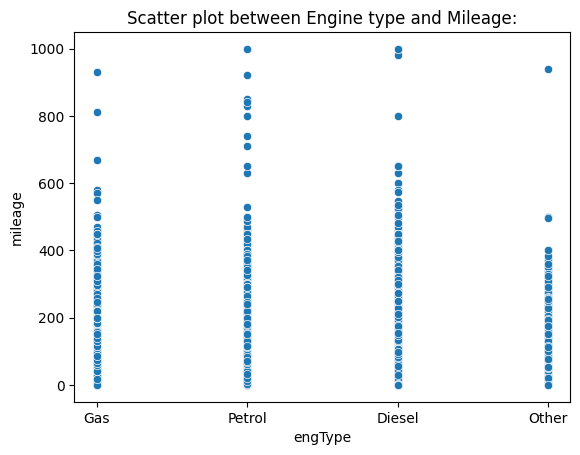

In [38]:
plt.title("Scatter plot between Engine type and Mileage:")
sns.scatterplot(x='engType',y='mileage',data=data)

#### Explanation :
##### The code uses Seaborn to plot engine type vs. mileage, revealing patterns between the two variables.

## 4.) Obtain a bivariate plot and a multivariable plot using the attributes of your choice from the given dataset.

<Axes: title={'center': 'Bivariate'}, xlabel='engV', ylabel='mileage'>

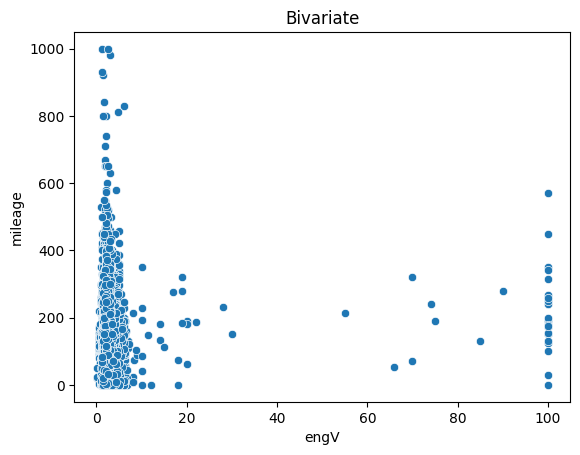

In [40]:
plt.title("Bivariate")
sns.scatterplot(x='engV',y='mileage',data=data)

<Axes: title={'center': 'Multivariable'}, xlabel='engType', ylabel='price'>

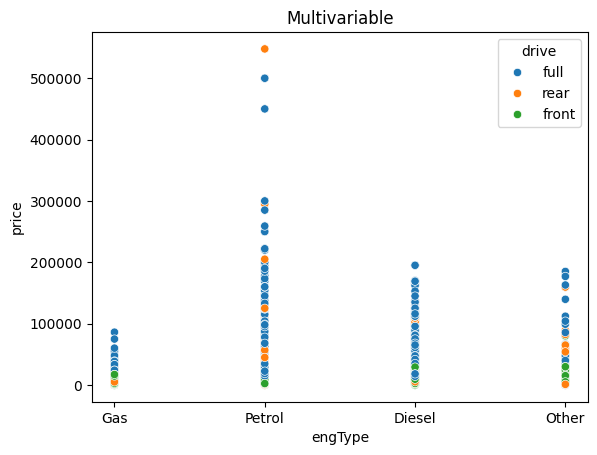

In [41]:
plt.title("Multivariable")
sns.scatterplot(x='engType',y='price',data=data,hue='drive')

#### Explanation :
##### A bivariate plot shows the relationship between two variables, while a multivariable plot analyzes multiple variables using heatmaps or 3D plots.

## 5. Identify the outliers from the given data and remove the outliers using any method .

In [47]:
num_cols = ['price', 'mileage', 'engV', 'year']
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
cleaned_data = remove_outliers(file, num_cols)
print(f"Original Data Size: {file.shape[0]} rows")
print(f"Cleaned Data Size: {cleaned_data.shape[0]} rows")

Original Data Size: 9576 rows
Cleaned Data Size: 7122 rows


#### Explanation :
##### I used quartiles to identify and remove outliers.